# Build an app
Tests on how to build an app to run the model

In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

Look for the model saved in `.pkl` format:

In [3]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [4]:
learn_inf = load_learner('export.pkl')

Now build the upload button in order to upload local images and get predictions from the model:

In [13]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [14]:
btn_upload = SimpleNamespace(data = ['/Users/francesco/Downloads/mono.jpg'])

In [15]:
img = PILImage.create(btn_upload.data[-1])

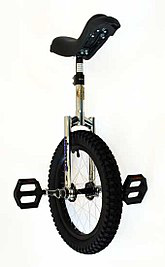

In [12]:
img

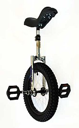

Output()

In [25]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [16]:
pred,pred_idx,probs = learn_inf.predict(img)

In [17]:
print(pred, pred_idx, probs)

monocycle tensor(1) tensor([4.4227e-06, 9.9818e-01, 9.8267e-06, 1.8095e-03])


In [18]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: monocycle; Probability: 0.9982')

In [19]:
btn_run = widgets.Button(description='Classify')
btn_run


Button(description='Classify', style=ButtonStyle())

In [22]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl:
        display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    
    lbl_pred.value = f'prediction: {pred}, probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [23]:
btn_upload = widgets.FileUpload()

In [26]:
VBox([widgets.Label('Upload a *-cycle picture!'),
     btn_upload,
     btn_run,
     out_pl,
     lbl_pred])